<a href="https://colab.research.google.com/github/Samaelthecreator/Primer-repositorio/blob/main/Sistemas_de_recomendaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio 4.1 - Sistema de recomendación de películas.

El caso se realizará con una base de datos obtenida de https://grouplens.org/


# Información del contacto;
Nombre: René Samael Flores Ortega

Correo: samaelflores1009@gmail.com

In [ ]:
#Importaremos las librerias que necesitamos
!pip install --upgrade pip
!pip install surprise==0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163705 sha256=718b8a751cbd0ee6260deab8712a690e02b10517c672af9e746b9364e885add6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [34]:
import pandas as pd         #Para la manipulación de datos
import matplotlib
import matplotlib.pyplot as plt
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Datos & visualizaciones

In [ ]:
#Importaremos el dataset con nombre 'ml-100k'  con el comando Dataset.load_builtin

db = Dataset.load_builtin('ml-100k')



Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
archivo_valoraciones =  db.ratings_file #de la base de datos escojemos el archivo rating files
#le damos un esquema dentro de colab
datos = pd.read_table(archivo_valoraciones, names = ['user_id', 'item_id', 'rating', 'timestamp'])
#Transformamos a tipo dataframe
Data = pd.DataFrame(datos)



pandas.core.frame.DataFrame

In [35]:
print(Data)

       user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


1     6.110
2    11.370
3    27.145
4    34.174
5    21.201
Name: rating, dtype: float64


<Axes: >

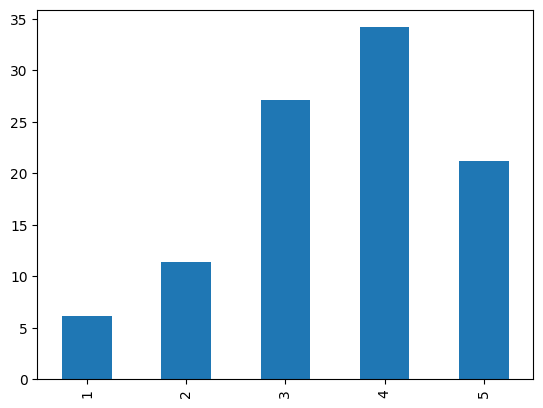

In [ ]:
puntuaciones = Data.rating
item = Data.item_id
usuarios = Data.user_id

print((puntuaciones.value_counts(normalize = True).sort_index())*100)

#Realizamos un histograma pata las puntuaciones
((puntuaciones.value_counts(normalize=True).sort_index())*100).plot.bar()


<Axes: >

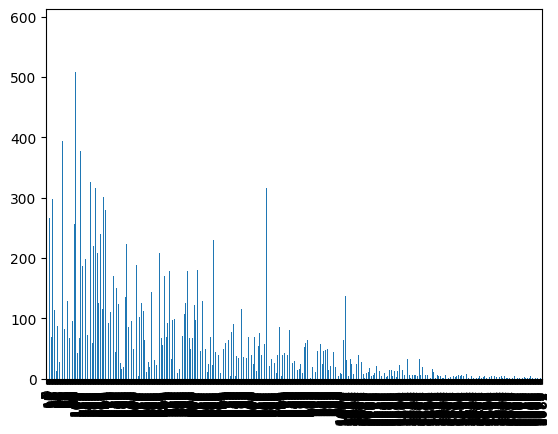

In [ ]:
#Para los items
print(item.value_counts().sort_index())
item.value_counts().sort_index().plot.bar()

<bound method Series.sort_index of 405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: user_id, Length: 943, dtype: int64>


<Axes: >

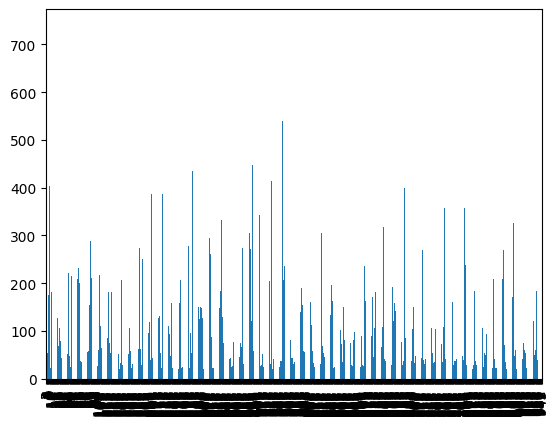

In [ ]:
#Para los usuarios
print(usuarios.value_counts().sort_index)
usuarios.value_counts().sort_index().plot.bar()

In [ ]:
print(Data.describe)

<bound method NDFrame.describe of        user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]>


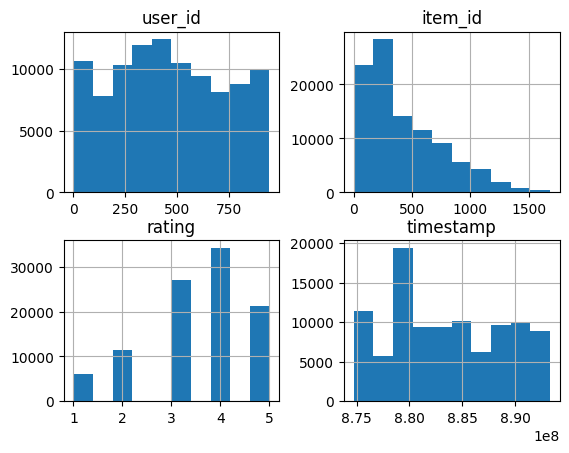

In [ ]:
Data.hist()
plt.show()

In [ ]:
print(Data.rating.isnull)


<bound method Series.isnull of 0        3
1        3
2        1
3        2
4        1
        ..
99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, Length: 100000, dtype: int64>


# *Análisis de datos*

Describe la forma de los datos, ¿como estan distribuidos? ¿Cuantas valoraciones hay disponibles?

**R: Para las puntuaciones existen una centralización del 27.14 % para la calificación 3 y de 34.17 % para la calificación 4.**

**Las cantidad de puntuaciones se centran para cierto grupo de items "preferenciales" los cuales son minoria, la mayoria tiene menos de 10000 calificaciones.**



# Modelo 1: aleatorio



In [ ]:
# Crear el objeto para el modelo
ModAl = NormalPredictor()

In [ ]:
#Validacion cruzada para k = 5
#Iteraciones, midiendo el RECM
Rmodel = cross_validate(ModAl, db, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5044  1.5210  1.5253  1.5375  1.5186  1.5214  0.0107  
Fit time          0.17    0.14    0.14    0.17    0.14    0.15    0.01    
Test time         0.09    0.08    0.09    0.09    0.68    0.21    0.23    


Entrenamiento del modelo finalizado con éxito!


# Modelo 2: Filtrado colaborativo en usuarios

Creacion Modelo KNNBasic

In [ ]:
#Creación del objeto para el modelo con base en usuarios
ModeloUsuarios = KNNBasic(sim_options={'user_based': True})

In [ ]:
#Entrenaremos los datos usando validación cruzada k=5 iteraciones
#Midiendo el RECM
UsuariosRes = cross_validate(ModeloUsuarios, db, measures=['RMSE'], cv=5, verbose=True)
print('\n\nEntrenamiento del modelo finalizado con éxito!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9810  0.9779  0.9803  0.9731  0.9852  0.9795  0.0040  
Fit time          0.51    0.38    0.37    0.48    0.36    0.42    0.06    
Test time         3.23    3.15    3.42    5.05    3.15    3.60    0.73    


Entrenamiento del modelo finalizado con éxito!


# Modelo 3: Filtrado colaborativo basado en ítems

Creación Modelo KNNBasic

In [ ]:
#Creacion del modelo
ModeloItems = KNNBasic(sim_options={'user_based': True})

In [ ]:
ItemRes = cross_validate(ModeloItems, db, measures=['RMSE'], cv=5, verbose=True)
print("Entrenamiento terminado")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9762  0.9830  0.9771  0.9823  0.9761  0.9790  0.0031  
Fit time          0.38    0.50    0.37    0.36    0.36    0.39    0.05    
Test time         3.07    5.15    3.12    3.14    4.70    3.83    0.90    
Entrenamiento terminado


**<h1>PREGUNTA 2: MODELOS DE FILTRADO COLABORATIVO</h1>**

# Compare los resultados de los modelos de filtrado colaborativo basados en usuarios y en items. ¿Qué diferencias encuentra entre los dos? ¿Qué diferencias encuentra entre estos modelos y el modelo aleatorio? ¿Puede explicar qué podría haber causado estas diferencias en los resultados?

  **R: Tomando el RMSE tiene una mejor afinidad el Modelo de filtrado colaborativo basado en usuarios que en Items.**

  **Ya que en el modelo de filtrado colaborativo basado en usuarios toma de referencia las relaciones (preferencias) entre usuarios, los datos más uniformes nos ayudan a un análisis más homogeneo a diferencia de el análisis de filtrado basado en Items, donde la distribución de ponderaciones en Items varia mucho y decrece con cada Item**

  **En resumen existe mayor capacidad de análisis en el filtrado de usuarios ya que existe mas información acerca de los usuarios que de los Items, y el modelo aleatorio simplemente realiza recomendaciones simples donde puede influir mucho en la forma de los datos, sin embargo sigue siendo una relación aleatoria.**


# Modelo 4: factorización de matriz

In [ ]:
#Creación del objeto para el modelo

ModeloMatrix = SVD()

In [ ]:
model_matrix_results = cross_validate(ModeloMatrix, db, measures=['RMSE'], cv=5, verbose=True)
print("entrenamiento terminado")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9356  0.9269  0.9454  0.9313  0.9377  0.9354  0.0062  
Fit time          1.47    1.44    1.46    1.45    2.22    1.61    0.31    
Test time         0.12    0.13    0.12    0.17    0.22    0.15    0.04    
entrenamiento terminado


**<h1>PREGUNTA 3: MODELO DE FACTORIZACIÓN DE MATRIZ</h1>**

#El modelo de factorización de matriz es diferente de los modelos de filtrado colaborativo. Describa brevemente en qué consisten dichas diferencias. También, compare de nuevo el RECM respecto al resto de modelos. ¿Mejora? ¿Puede ofrecer alguna explicación de por qué mejora/empeora?

**R: El modelo de factorización de matriz descompone el conjunto de datos en subconjuntos que se pueden tratar "independientemente", lo que conlleva a un análisis mas preciso. A diferencia de los modelos de filtrado colaborativo, donde el análisis depende en gran medida de la forma del conjunto de datos que se este tratando así como su validez propia.**


# Precisión y Exhaustividad;

Calcularemos la precisión y la exhaustividad para 2 valores de k: 5 y 10.
Primero, definimos una función que toma algunas predicciones, un valor de `k` y un parámetro de umbral. Este código ha sido adaptado de la siguiente [fuente](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [ ]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Devuelve la precision y la exhaustividad @k para cada usuario'''

    # Primero asocie las predicciones a cada usuario
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Ordene las valoraciones de los usuarios por su valor estimado
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Número de ítems relevantes
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Número de ítems recomendados en el top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Número de ítems relevantes y recomendados en el top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@k: proporción de ítems recomendados que son relevantes
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Exhaustividad@K: proporción de ítems relevantes que se recomiendan
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('\n\nFunción creada con éxito!')

A continuación, calculamos la precisión y exhaustividad k = 5 y k = 10. Usamos validación cruzada con 5 iteraciones de nuevo para promediar los resultados a lo largo de toda la base de datos.


In [32]:
# Cree una lista de los valores de k
K = [5, 10]

# Cree una lista de modelos

models = [ModAl, ModeloUsuarios, ModeloItems, ModeloMatrix]
model_names = ['modelo aleatorio', 'filtrado colaborativo usuario',
               'filtrado colaborativo ítem','factorización de matriz']

# Cree un objeto de validación cruzada con k-iteraciones (diferente "k")
k_fold = KFold(n_splits=5)

for k in K:
    for i, model in enumerate(models):
        print(f'>>> k={k}, modelo={model_names[i]}')
        precision = []
        exhaustividad = []
        for trainset, testset in k_fold.split(db):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # La precisión y la exhaustividad pueden promediarse sobre todos los usuarios
            precision.append(sum(prec for prec in precisions.values()) / len(precisions))
            exhaustividad.append(sum(rec for rec in recalls.values()) / len(recalls))

        print('>>> precisión:', round(sum(precision) / len(precision), 4))
        print('>>> exhaustividad  :', round(sum(exhaustividad) / len(exhaustividad), 4))
        print('\n')

print('\n\nCálculo de la precisión y la exhaustividad finalizado con éxito!')

>>> k=5, modelo=modelo aleatorio
>>> precisión: 0.5896
>>> exhaustividad  : 0.3419


>>> k=5, modelo=filtrado colaborativo usuario
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.7628
>>> exhaustividad  : 0.4553


>>> k=5, modelo=filtrado colaborativo ítem
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precisión: 0.7657
>>> exhaustividad  : 0

**<h1>PREGUNTA 4: PRECISIÓN/EXHAUSTIVIDAD</h1>**

# Calcule la precisión y la exhaustividad, para cada uno de los 4 modelos, con `k` = 5 y 10. Es decir, 2 x 2 x 4 = 16 valores numéricos. ¿Nota algo diferente en estos valores? ¿Algo diferente de los valores de RECM calculados anteriormente?

**R Incrementan tanto su precisión como su exhaustividad, el modelo con mayor precisión y exhaustividad es el modelo de factorización de matriz**

##  Top-`n` Predicciones

Finalmente, queremos ver cómo son las recomendaciones y las estimaciones de valoraciones de los usuarios.

In [ ]:
def get_top_n(predictions, n=5):
    '''Devuelve las top-N recomendaciones para cada usuario de un conjunto de predicciones.

    Argumentos:
        predictions(lista de objetos de predicción): lista de la predicciones,
            tal y como se obtienen del método "test" de un algoritmo
        n(int): número de recomendaciones a mostrar para cada usuario.
            Por defecto es 10.

    Salidas:
    Un diccionario donde las keys son las IDs de los usuarios y los valores son
    una lista de tuples:
        [(item id, estimación de la valoración), ...] de tamaño n.
    '''

    # Primero asocie las predicciones a cada usuario.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # A continuación ordene las predicciones para cada usuario y obtenga las
    # n predicciones más elevadas
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Función creada con éxito!')

Por último, ejecutamos esta función en cada uno de los modelos, primero entrenando en **la totalidad** de los datos disponibles, y después prediciendo los datos que faltan. Usamos `n` = 5, pero puede elegir cualquier valor razonable de n.

In [29]:
trainset = db.build_full_trainset()
testset = trainset.build_anti_testset()
print('\n\nConjuntos de prueba y entrenamiento creados con éxito!')



Conjuntos de prueba y entrenamiento creados con éxito!


In [ ]:
for modelo in models:
    modelo.fit(trainset)
    predictions = modelo.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Muestre el primer usuario de la base de datos
    user = list(top_n.keys())[0]
    print(f'modelo: {modelo}, {user}: {top_n[user]}')

print('\n\nCálculo de las top-N predicciones realizado con éxito!')

**<h1>PREGUNTA 5: TOP-N PREDICCIONES</h1>**

# ¿Tienen sentido las top-n predicciones que ha obtenido? ¿Cuál es el valor de las valoraciones (1-5) de estas predicciones? ¿Cómo podría usar estas predicciones en la vida real si estuviera intentando construir un sistema de recomendación genérico para una compañía?

# Análisis adicional: K optimo segun RMSE:

In [31]:
# Evaluar RMSE para los siguientes valores de K
# se busca determinar el K óptimo de manera gráfica.
# --------------------------------------------------
k_value = [5,10,20,50,100]
error = list()
for i  in k_value:
  model_user_results = cross_validate(ModeloUsuarios, db, measures=['RMSE'],cv=i, verbose=False)
  error_medio=(model_user_results['test_rmse'].sum())/i
  error.append(error_medio)
  print(error_medio)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9780221953472392
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity mat

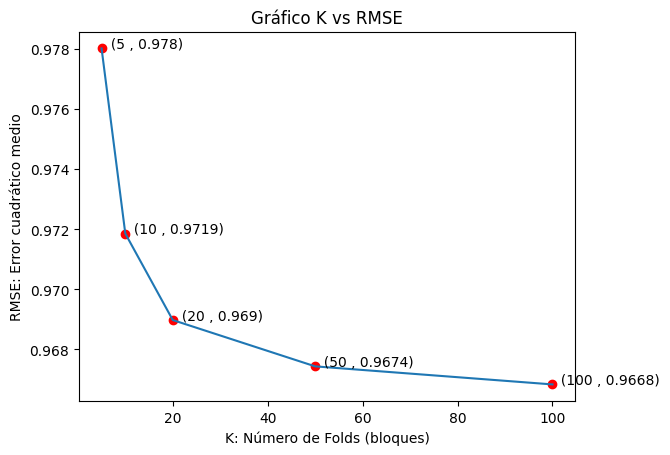

In [33]:
dicc ={'k_value(K)':k_value, 'error(RMSE)':error}
df=pd.DataFrame(dicc)


import matplotlib.pyplot as plt
import math
plt.plot(k_value,error)
plt.scatter(k_value, error,marker='o', color='r')
annotations=[]
for i in range(0,len(error)):
  annotations.append('  ('+ str(k_value[i]) + ' , ' + str(round(error[i],4)) +')')
for i, label in enumerate(annotations):
    plt.text(k_value[i], error[i],label)
plt.xlabel('K: Número de Folds (bloques)')
plt.ylabel('RMSE: Error cuadrático medio')
plt.title('Gráfico K vs RMSE')
plt.show()